Практическая работа № 5 Самсоненко Станислав Владимирович

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("healthcare_dataset.csv")

In [3]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [6]:
data.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [7]:
cat_columns = data.select_dtypes(['object']).columns

In [16]:
data = data[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [17]:
data.head()

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1,1
2,2,1,2,2,2,2,2,0,1,2,1,1
3,3,1,2,1,3,3,3,0,2,3,2,2
4,4,1,0,3,4,4,4,1,2,4,3,1


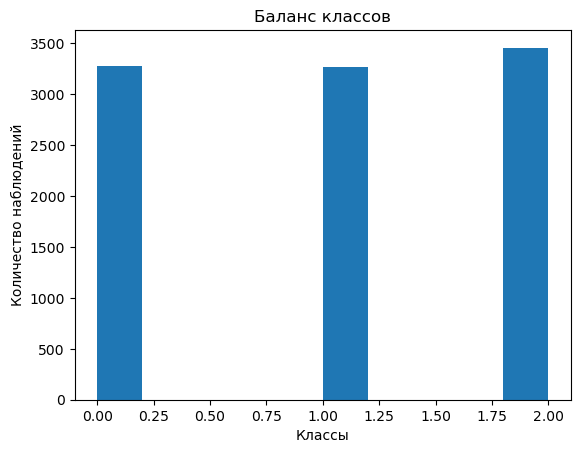

In [19]:
plt.hist(data['Test Results'])
plt.xlabel('Классы')
plt.ylabel('Количество наблюдений')
plt.title('Баланс классов')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

# Разбиение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data.drop('Test Results', axis=1), data['Test Results'], test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Логистическая регрессия
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)


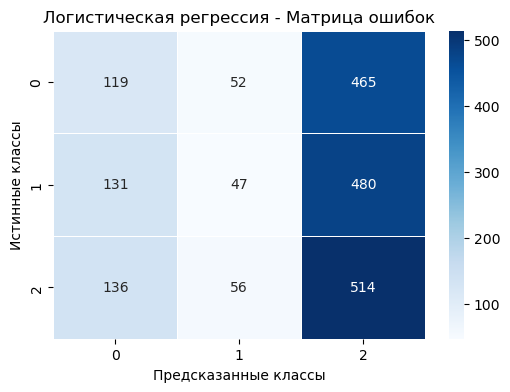

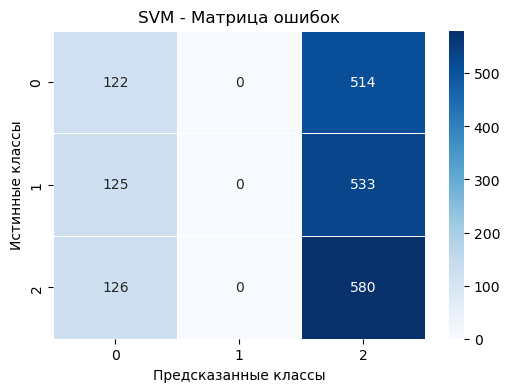

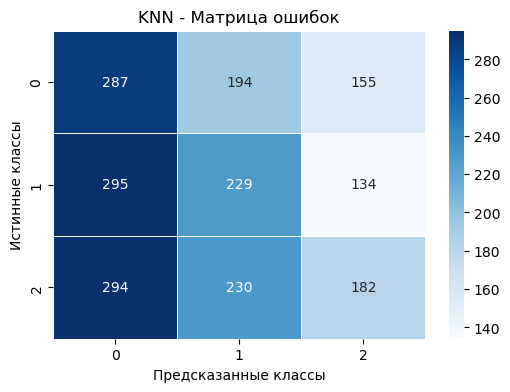

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Функция для построения матрицы ошибок и ее визуализации
def plot_confusion_matrix(model_name, conf_matrix):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5)
    plt.title(f'{model_name} - Матрица ошибок')
    plt.xlabel('Предсказанные классы')
    plt.ylabel('Истинные классы')
    plt.show()

# Логистическая регрессия
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)
plot_confusion_matrix('Логистическая регрессия', lr_conf_matrix)

# SVM
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
plot_confusion_matrix('SVM', svm_conf_matrix)

# KNN
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)
plot_confusion_matrix('KNN', knn_conf_matrix)


In [22]:
from sklearn.metrics import classification_report

# Логистическая регрессия
print("Логистическая регрессия:")
print(classification_report(y_test, lr_predictions))

# SVM
print("\nSVM:")
print(classification_report(y_test, svm_predictions))

# KNN
print("\nKNN:")
print(classification_report(y_test, knn_predictions))


Логистическая регрессия:
              precision    recall  f1-score   support

           0       0.31      0.19      0.23       636
           1       0.30      0.07      0.12       658
           2       0.35      0.73      0.47       706

    accuracy                           0.34      2000
   macro avg       0.32      0.33      0.27      2000
weighted avg       0.32      0.34      0.28      2000


SVM:
              precision    recall  f1-score   support

           0       0.33      0.19      0.24       636
           1       0.00      0.00      0.00       658
           2       0.36      0.82      0.50       706

    accuracy                           0.35      2000
   macro avg       0.23      0.34      0.25      2000
weighted avg       0.23      0.35      0.25      2000


KNN:
              precision    recall  f1-score   support

           0       0.33      0.45      0.38       636
           1       0.35      0.35      0.35       658
           2       0.39      0.26     

C:\Users\samso\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samso\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samso\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
